Importando Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Carregando a base de dados.

dados = pd.read_csv('precos_carros_brasil.csv')

In [4]:
# Verificando a existencia de elementos sem valor nenhum

dados.isna().sum()


year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [5]:
# A função dropna() apaga as linhas que contem entradas com dados "não disponiveis"
dados = dados.dropna()

In [6]:
# Tratamento para resolver a questão dos elementos sem valor nenhum

dados['year_of_reference'].fillna('NaN',inplace=True)
dados['month_of_reference'].fillna('NaN',inplace=True)
dados['fipe_code'].fillna('NaN',inplace=True)
dados['authentication'].fillna('NaN',inplace=True)
dados['brand'].fillna('NaN',inplace=True)
dados['model'].fillna('NaN',inplace=True)
dados['fuel'].fillna('NaN',inplace=True)
dados['gear'].fillna('NaN',inplace=True)
dados['engine_size'].fillna('NaN',inplace=True)
dados['year_model'].fillna('NaN',inplace=True)
dados['avg_price_brl'].fillna('NaN',inplace=True)

In [7]:
# Criando duas  para armazenar as colunas categoricas e numéricas

numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

Text(0, 0.5, 'Quantidade de unidades em circulação')

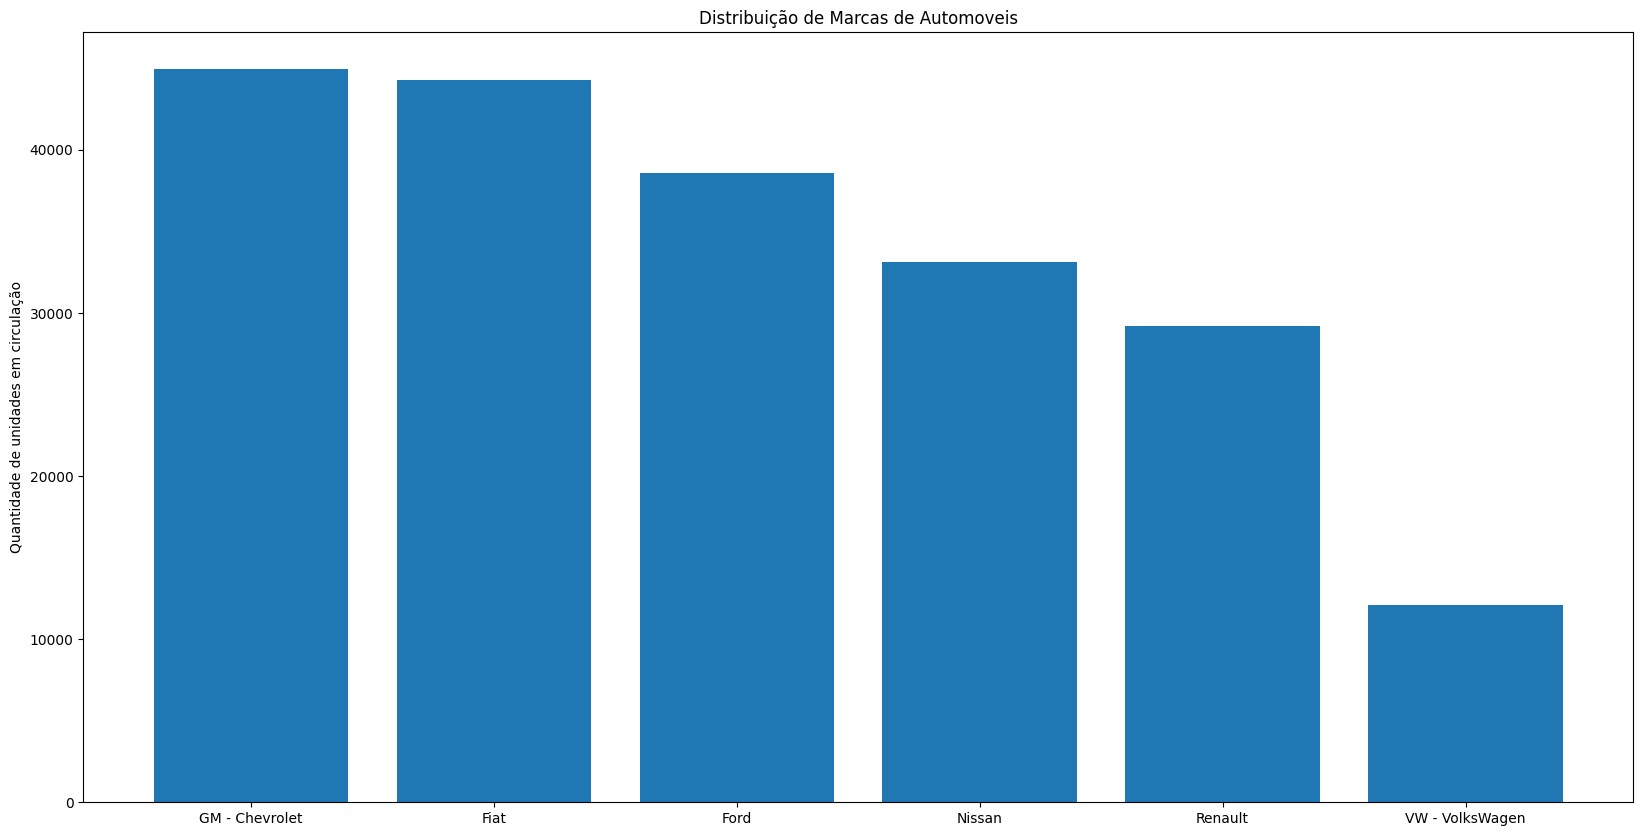

In [8]:
plt.figure(figsize=(20,10))
plt.bar(dados['brand'].unique(), dados['brand'].value_counts())
plt.title('Distribuição de Marcas de Automoveis')
plt.ylabel('Quantidade de unidades em circulação')

Text(0.5, 1.0, 'Distribuição de acordo com as engranagens')

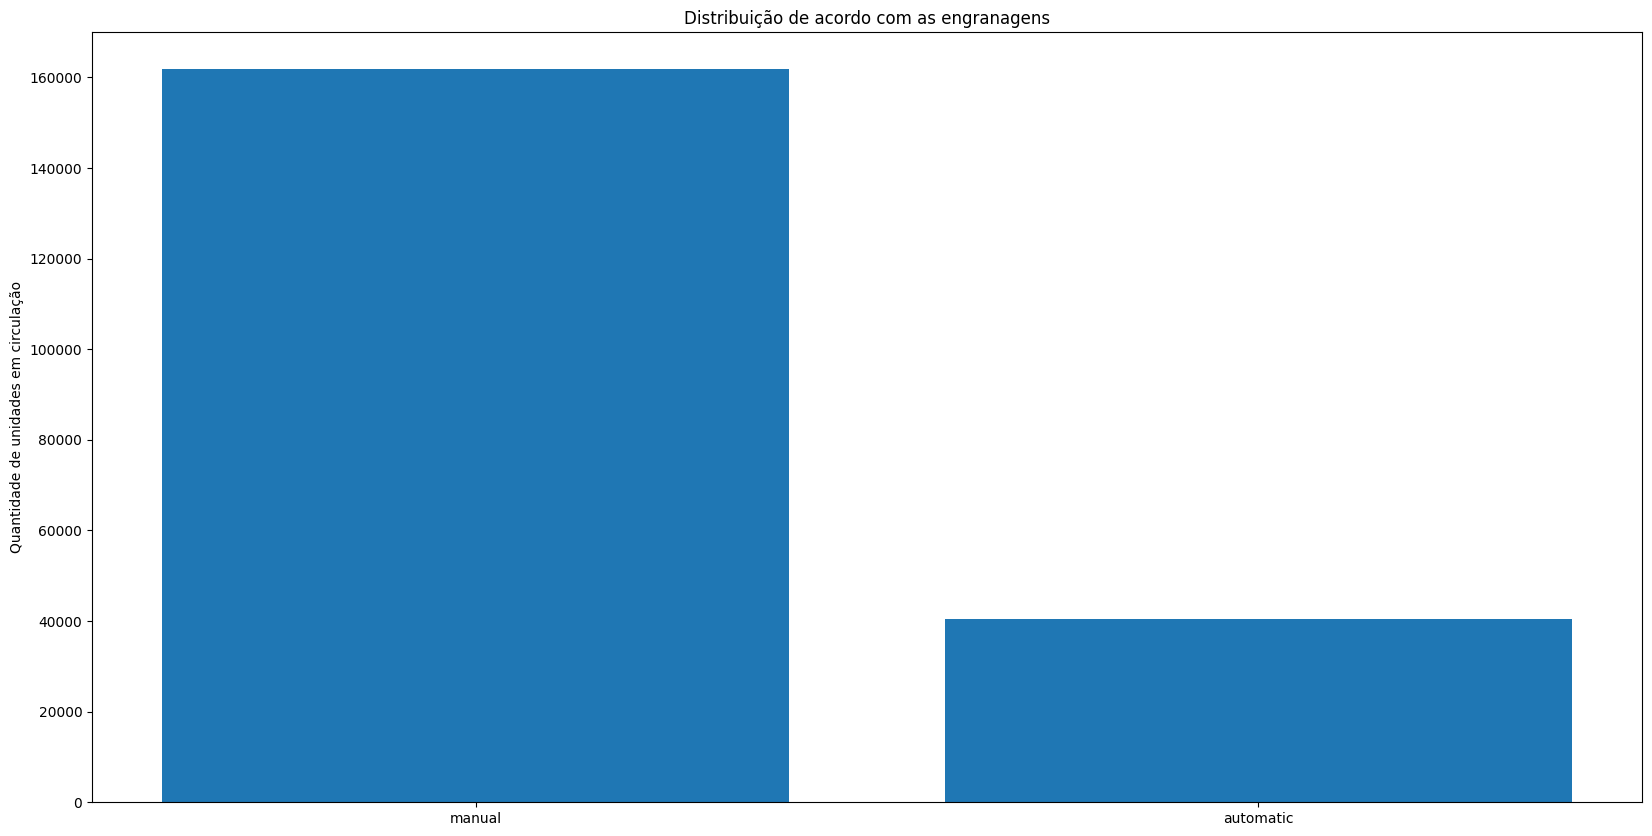

In [9]:
plt.figure(figsize=(20,10))
plt.bar(dados['gear'].unique(),dados['gear'].value_counts())
plt.ylabel('Quantidade de unidades em circulação')
plt.title('Distribuição de acordo com as engranagens')

Text(0.5, 1.0, 'Media de preços no Ano de 2022')

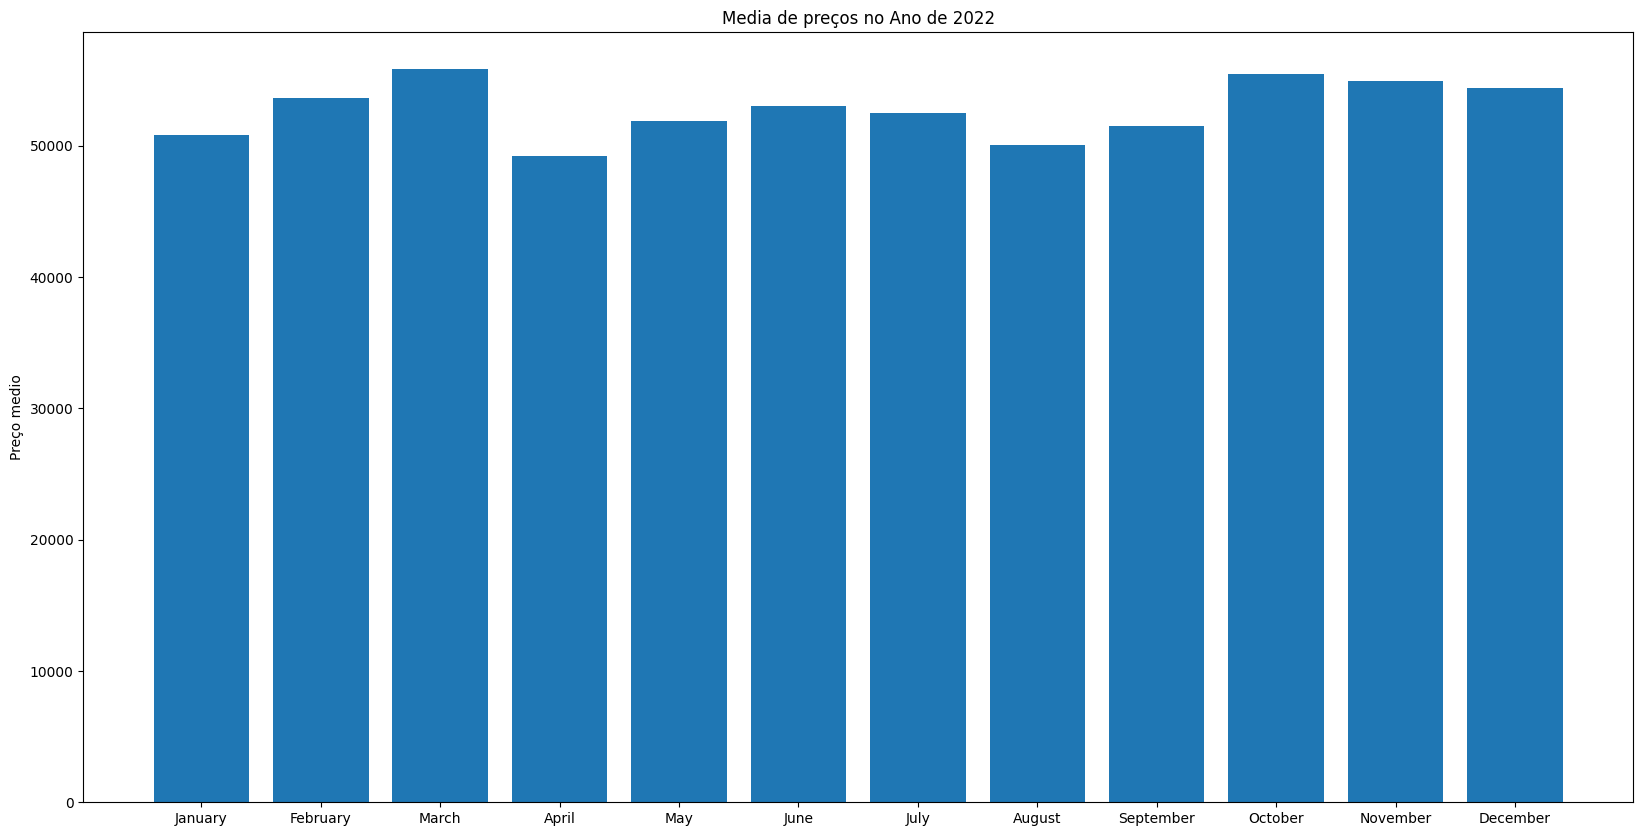

In [14]:
ano_2022 = dados[dados.year_of_reference == 2022]

plt.figure(figsize=(20,10))
plt.bar(ano_2022['month_of_reference'].unique(),dados.groupby('month_of_reference')['avg_price_brl'].mean().round())
plt.ylabel('Preço medio');
plt.title('Media de preços no Ano de 2022')

-

In [15]:
media_marca_engrenagem = dados.groupby(['brand','gear'])['avg_price_brl'].mean().round()

media_marca_engrenagem = media_marca_engrenagem.reset_index(name='Preco Medio')

media_marca_engrenagem.head()

,brand,gear,Preco Medio
0,Fiat,automatic,97397.0
1,Fiat,manual,39694.0
2,Ford,automatic,84769.0
3,Ford,manual,51785.0
4,GM - Chevrolet,automatic,88157.0


<Axes: xlabel='brand', ylabel='Preco Medio'>

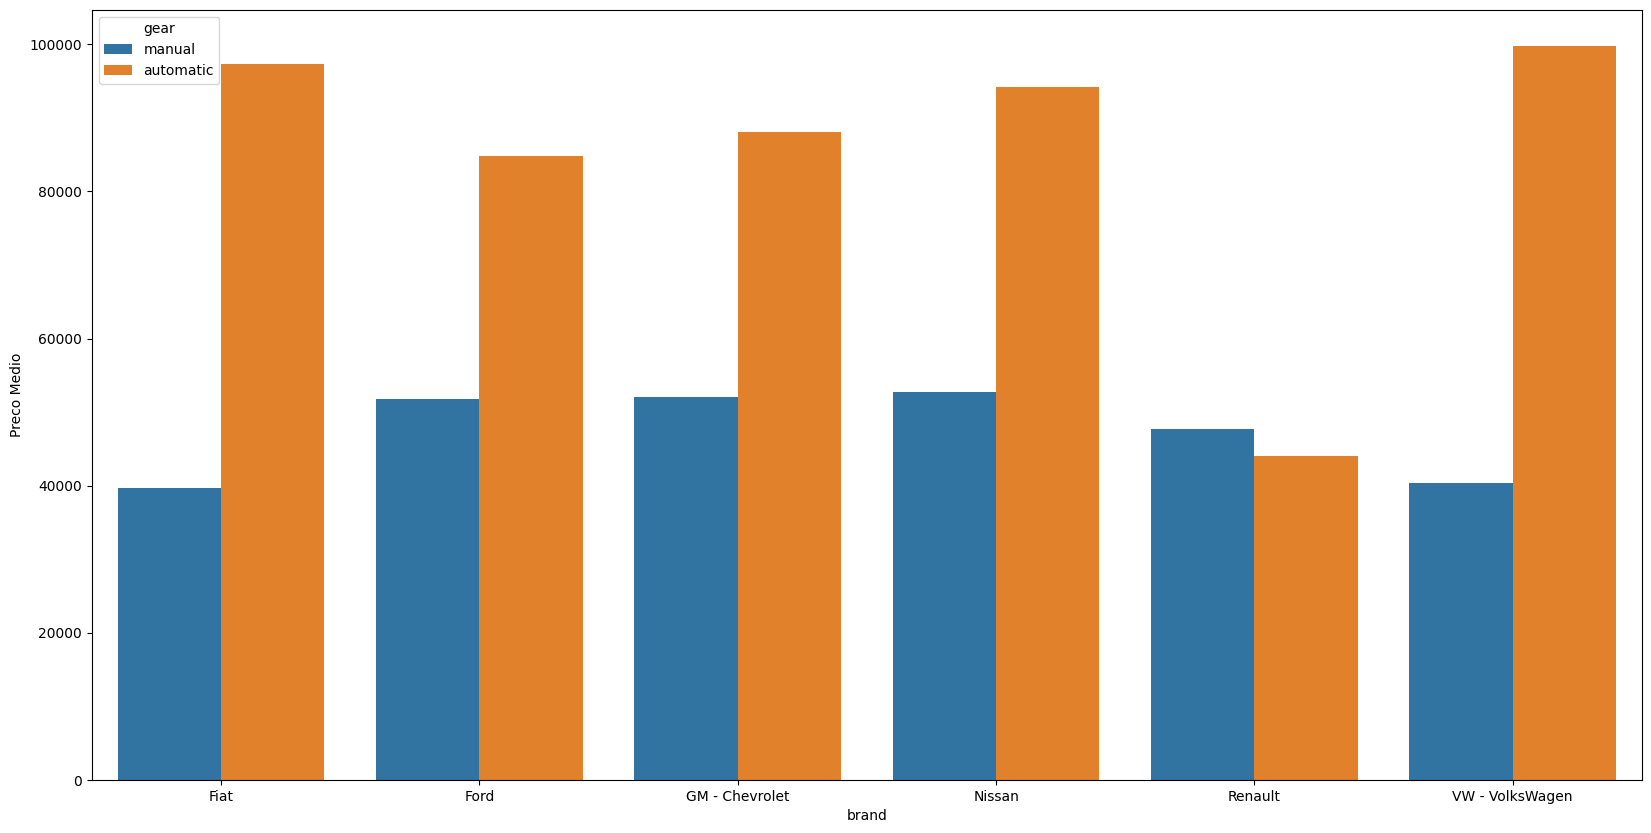

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(data=media_marca_engrenagem,x='brand',y='Preco Medio', hue='gear', hue_order=['manual','automatic'])

<Axes: xlabel='brand', ylabel='Preco'>

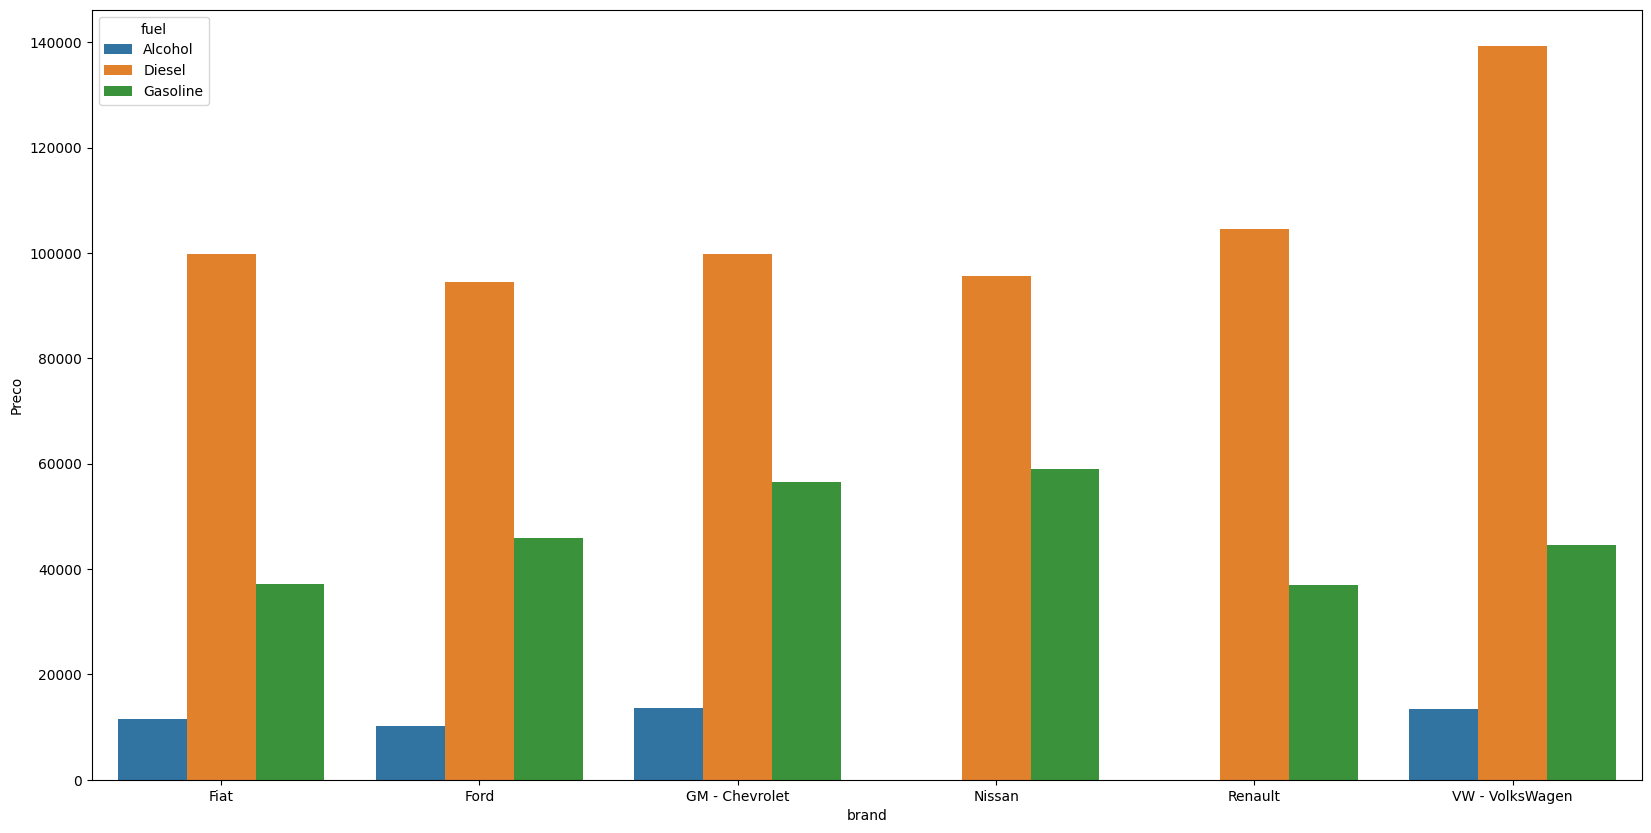

In [13]:
marca_tipo_combustivel = dados.groupby(['brand','fuel'])['avg_price_brl'].mean().round()

marca_tipo_combustivel = marca_tipo_combustivel.reset_index(name='Preco')

plt.figure(figsize=(20,10))
sns.barplot(data=marca_tipo_combustivel,x='brand',y='Preco',hue='fuel',hue_order=['Alcohol','Diesel','Gasoline'])